## Text Classification 

### Predicting Category

### Objectives

On completing the assignment, you will learn how to write a simple text classification ai application.

### Description
 
Write an AI application which, given a sentence, will predict as to which category the text of the sentence belongs: sports, religion, autos, space, electronics etc. For training and testing purposes, please use the labeled dataset provided in the file, newsgroups.csv. The dataset contains 5572 news items from 20 different news categories. The news items are labeled with categories numbers 0 to 19. However, another file, news_cat_names.csv, is provided that contains the corresponding names of the categories. So, you can obtain a category name by indexing the category number into category name list. Use 80% of the data items for training, and the remaining 20% for testing. After testing, produce accuracy score, classification report, and confusion matrix. Then, try out a few of your own and note the category predicted by the application.

### Implementatation

### Data set (corpus) used for the application

Use the data set (corpus) in the following files:

"newsgroups.csv" and news_cat_names.csv

The first file above contains 5572 news items from 20 different news categories. The news categories are labeled 0 to 19.

The second file contains the names of news categories, The category names in the second file match in order of category number 0 to 19 in the first file. So, you can access the category name of a particular category by using the category number as an index.

### Load the data set

Loaded the data files into pandas data frames as shown below.

    df=pd.read_csv("newsgroups.csv", index_col=0)
    df_cat=pd.read_csv("news_categories.csv", index_col=0)

### Assign Category column to y and Message column to X

- Assign the Category column to variable y (the labels).
- Assign the Message column to variable X (the features). 

### Vectorize data

Vectorize data using TfidfVectorizer. The data passed to the vectorizer should be either a pandas Series object or list object or similar iterable object. If it is plain text, just covert it to a list object. The code for the vectorizer is given below where X is a Series object (or a list of text) that need to be vectorized.

    from nltk.corpus import stopwords
    from sklearn.feature_extraction.text import TfidfVectorizer

    tfidf_vect = TfidfVectorizer(max_features=2000, min_df=5,  max_df=0.7, \
                 stop_words=stopwords.words('english') )
    X_vectorized= tfidf_vect.fit_transform(X).toarray()

### Split data

Split data X_list_vectorized, y into X_train, X_test, y_train, and y_test data using train_test_split function of sklearn.model_selection module. Use 80% of the data for training and the rest for testing.

### Train algorithm

Train MultinomialNB classifier (of sklearn.naive_bayes module using the training data X_train and y_train as below:

    from sklearn.naive_bayes import MultinomialNB
    clf = MultinomialNB()
    clf = clf.fit(X_train, y_train)

### Test Algorithm

Test the trained classifier with testing data X_test as below

    y_predict = clf.predict(X_test)

### Print Result

Print accuracy score, classification report, and confusion matrix

### Test your own sentences

Test at least 6 made-up sentences using the vectorizer and trained classifier and print the resultant category as a number and as a name.

For vectorizing, you would need to convert your quoted text into a list by enclosing it within the square brackets [ ] before passing it to vectorizer.

A few suggested sentences are below:

    'He is a catholic',
    'Who will be the next US president',
    'We should drive our cars safely',
    'Television needs electicity to work'

Below is the example code

    input= "He is a catholic"
    df_cat.Category_Names[clf.predict(vect.transform([input]))]

The above gave the following output:
15    Christianity
Name: Category_Names, dtype: object

When done, put all of your selected sentences as a list in a variable as shown below. Then vecterize and test them as a group and print the result as a group both as category numbers and names

    input_data = ['He is a catholic',
    'Who will be the next US president',
    'We should drive our cars safely',
    'Television needs electicity to work']

### Submittal

The uploaded submittal should contain the following:

### Coding

Follow steps similar to those in spam email application.

### Submittal

The uploaded submittal should contain the following:

- jpynb file after runninng the application from start to finish containing the marked source code, output, and your interaction.
- the corresponding html file.

### Discussion

The discussion on classifying text documents follows.

####  Introduction

Many words in the documents are not relevant to classifying the documents and can be excluded. In general, punctuation marks and other symbols are removed from the documents. Short words such as "to", "on", "the" etc. (called stop words) are also taken out. Furthermore, words with the same root such as eats, eating, ate, eaten, etc. are replaced with their common root words. So, documents go through a good deal of preprocessing before they are encoded into numerical values (numerical vectors). 

#### Vectorizing Documents (Encoding documents into numerical values)

The process of encoding documents into numerical values is called vectorizing because each document is encoded into a numerical vector (array of numerical values). The two common methods of vectorizing documents are "Bag of Words" (BOG) and "Term Frequency Inverse Document Frequency" (TFIDF) and they are described below.

#### Bag of Words (BOW)

In this method, each sample document is encoded into a numerical vector (numerical array) made up of several numerical values. 

##### Preparing vocabulary for the corpus

In using this method, at first, we prepare vocabulary of all words used in the whole corpus (in all the sample documents in the data set) and assign each word a unique id (index) so that each word can be identified by its id (index). For example, if there are 200 different words used in the whole corpus, then its vocabulary is 200 words and each word is assigned a unique id (index) from 0 to 199.

After that, we  assign to each document, a document vector (an array of numbers) of the same size as vocabulary size for the whole corpus. So, for a corpus with vocabulary size of 200 words, we assign each document, a 200 size numerical vector (numerical array) where the first value in the vector pertains to the word whose id (index) is 0, the second pertains to the word whose id (index) is 1, the third pertains to the word whose id (index) is 2, and so on. 

Then we start assigning values to vectors. In assigning values to a document vector, we start with the first value in the vector. This value pertains to the word whose id (index) is zero. So, in vocabulary, we lookup the word whose id (index) is zero. Then we go to the document and determine the frequency of use of that word (how many times this words has been used in the document). Then, we assign the frequency of use value as the value in the vector. (Note that if the word is never used in the document, its frequency of use is zero; if it is used once, its frequency of use is 1; if it is used twice, its frequency of use is 2;  and so on.) 

We repeat this process for every value in the vector and each time, we assign the frequency of use of the corresponding word in the document, as the value in the vector. Thus, each value in the document vector indicates the frequency of use of the corresponding word in the document. 

As an example of the above, see Example 1 below. In Example 1, our corpus is made up of three short sample documents, doc 1, doc 2, and doc 3, each containing a sentence. 

First we determine the vocabulary for the whole corpus. It comprises 8 words and is shown below. The ids (indices) of these words are also shown below and they are from 0 to 7.

Then, we determine the vector for each document. 

For example, for doc 3, the first value of the vector pertains to the word whose id (index) is 0. From vocabulary, we find that the word with id (index) 0 is 'sue'. Then, we determine the frequency of use of the word 'sue' in doc 3. It is not used at all. Consequently, its frequency of use is zero. So, we assign 0 as the first value of the vector. 

Similarly, we determine the next value of the vector. The next value of the vector pertains to the word whose id (index) is 1. From vocabulary, we find that the word with id (index) 1 is 'is'. Then, we determine the frequency of use of the word 'is' in doc 3. The word 'is' is used in the document twice. Consequently, its frequency of use is 2. So, we assign 2 as the next value of the vector. 

We repeat this for determining other values of doc 3 vector. When all values are determined, the doc 3 vector values are: 0, 2, 2, 0, 1, 1, 1, 1 as shown below.

##### Example 1

              doc 1: sue is ok 
              doc 2: jim is ok 
              doc 3: sam is ok but joe is not ok 

              vocabulary:  sue is ok jim sam but joe not 
              word id's:    0   1  2  3   4   5   6   7 

              doc 1 vector: 1   1  1  0   0   0   0   0 
              doc 2 vector: 0   1  1  1   0   0   0   0 
              doc 3 vector: 0   2  2  0   1   1   1   1 


#### Term Frequency Inverse Document Frequency (TFIDF)

This method of assigning a numerical vector to each document is identical to the method of 'Bag of Words' (BOW) described above except that, in the last step of assigning values to the vector, instead of assigning frequency of use values, we assign TFIDF values of the corresponding words.

A TFIDF value of a word is calculated by multiplying its TF and IDF values as described below.

##### Term Frequency (TF) value

Term frequency of a word (TF) is equal to: ("the frequency of the word in the document" divided by "the total number of words in the document"). The concept behind TF is that the more frequent a word is in a document, the more it is relevant to the document. 

##### Inverse Document Frequency

Inverse Document Frequency (IDF) of a word is equal to: the log of ("total number of documents in the corpus" divided by "the number of documents in which the word is used"). When the corpus contains huge number of documents, the numerator and the quotient of the value in parentheses above can become very large. By taking a log of the value, the value of IDF is kept manageable. The concept behind IDF is that a word which is used in too many documents, such as the word 'the', that word is not relevant to the document. However, if a word is only used in a few documents, then it is relevant to those documents.  

##### Combining TF and IDF

TFIDF is obtained by multiplying TF and IDF. However, there is a variety of ways in which IDF and TFIDF are calculated and combined.

#### An example of assigning TFIDF values 

For an example of assigning TFIDF values, see Example 2 below. Example 2 is identical to Example 1 above except that we are assigning TFIDF values to the document vectors in place of assigning the frequency of use values. 

The TFIDF vector values for the three documents doc 1, doc 2, and doc 3, are shown below. We describe below the process of determining values for doc 3 vector. 

The first value in the doc 3 vector pertains to the word whose id (index) is 0. From vocabulary, we find that the word with id (index) 0 is 'sue'. 

Since, word 'sue' is used 0 times (not used at all) in doc 3 out of a total of 8 words that make up 3, its TF value is 0 as shown below.

TF (relative frequency of use) value for word 'sue' for doc 3 vector:
frequency of use in doc 3 / total number of words in doc 3 = 0/8 = 0 

TFIDF value for word 'sue': TF * IDF = 0 * IDF = 0

Calculating in the same way, the first four values for doc 3 vector are 0.

Now, we discuss the calculation for the fifth value of doc 3 vector. This value corresponds to the word whose id (index) is 4. Per vocabulary, that word is 'sam'. The calculation TFID for the word 'sam' for doc 3 vector are shown below.

TF (relative frequency of use) value for word 'sam' in doc 3 vector:
frequency of use in doc 3 / total number of words in doc 3 = 1/8 = 0.125 

IDF (relative inverse document frequency) value for word 'sam' in doc 3 vector:
log (total documents in the copus/number of documents containing 'sam')= 
log (3/1) = log 3 = 0.477 

TFIDF value for word 'sam': TF * IDF = 0.125 * 0.477 = 0.06

Similarly, the remaining values of doc 3 vector are .06 as indicated below.


##### Example 2

              doc 1: sue is ok 
              doc 2: jim is ok 
              doc 3: sam is ok but joe is not ok 

              vocabulary:   sue  is  ok  jim  sam  but  joe  not 
              word id's:    0    1   2   3    4    5    6    7 

              doc 1 vector: .16  0   0   0    0    0    0    0 
              doc 2 vector: 0    0   0  .16   0    0    0    0 
              doc 3 vector: 0    0   0   0   .06  .06  .06  .06


- jpynb file after runninng the application from start to finish containing the marked source code, output, and your interaction.
- the corresponding html file.


## Title: NLP Assignment: NLP News Classification

### Keith Yrisarri Stateson
July 18, 2024. Python 3.11.0

##### Summary
This program is an AI application designed to classify news articles into their respective categories such as sports, religion, autos, space, electronics, etc. The goal is to predict the category of a given sentence using a supervised learning approach. The assignment uses a labeled dataset (newsgroups.csv) containing 5572 news items from 20 different categories, indexed from 0 to 19. A corresponding file (news_cat_names.csv) provides the names of these categories.

The application involves data loading, preprocessing (including text vectorization), model training using the Multinomial Naive Bayes classifier, and evaluation of the model's performance using accuracy score, classification report, and confusion matrix. Additionally, the trained model is tested with new sample sentences to predict their categories.

Assumptions
The dataset provided is representative of typical news articles. The TF-IDF vectorization captures the essential features needed for classification. The category names in news_cat_names.csv correspond accurately to the category indices in newsgroups.csv.

## Import Libraries and Load and Analyze the Datasets

In [38]:
import pandas as pd
df = pd.read_csv('newsgroups.csv')
df_cat = pd.read_csv('news_categories.csv')

print(f'newsgroups.csv Dataframe Overview\nRows x Columns: {df.shape}\nSample\n{df.head()}')
print(f'\news_categories.csv Dataframe Overview\nRows x Columns: {df_cat.shape}\nSample\n{df_cat.head()}')

print(f'\nTotal values in category column in newsgroups.csv: {len(df.Category.value_counts())}')
print(f'Total values in category column in news_categories.csv: {len(df_cat.Category_Names.value_counts())}')

# note that both index columns in the csv files are not named

newsgroups.csv Dataframe Overview
Rows x Columns: (11314, 3)
Sample
   Unnamed: 0  Category                                               Text
0           0         7  From: lerxst@wam.umd.edu (where's my thing)\nS...
1           1         4  From: guykuo@carson.u.washington.edu (Guy Kuo)...
2           2         4  From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3           3         1  From: jgreen@amber (Joe Green)\nSubject: Re: W...
4           4        14  From: jcm@head-cfa.harvard.edu (Jonathan McDow...

ews_categories.csv Dataframe Overview
Rows x Columns: (20, 2)
Sample
   Unnamed: 0   Category_Names
0           0          Atheism
1           1         Graphics
2           2       MS Windows
3           3  IBM PC Hardware
4           4     Mac Hardware

Total values in category column in newsgroups.csv: 20
Total values in category column in news_categories.csv: 20


## Exploratory Data Analysis and Preprocessing Data

In [71]:
# Check if any row has an empty value
df.isnull().sum()

Unnamed: 0    0
Category      0
Text          0
dtype: int64

In [39]:
df.Category.value_counts()  # display the count of each category in newsgroups.csv

Category
10    600
15    599
8     598
9     597
11    595
7     594
13    594
5     593
14    593
2     591
12    591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: count, dtype: int64

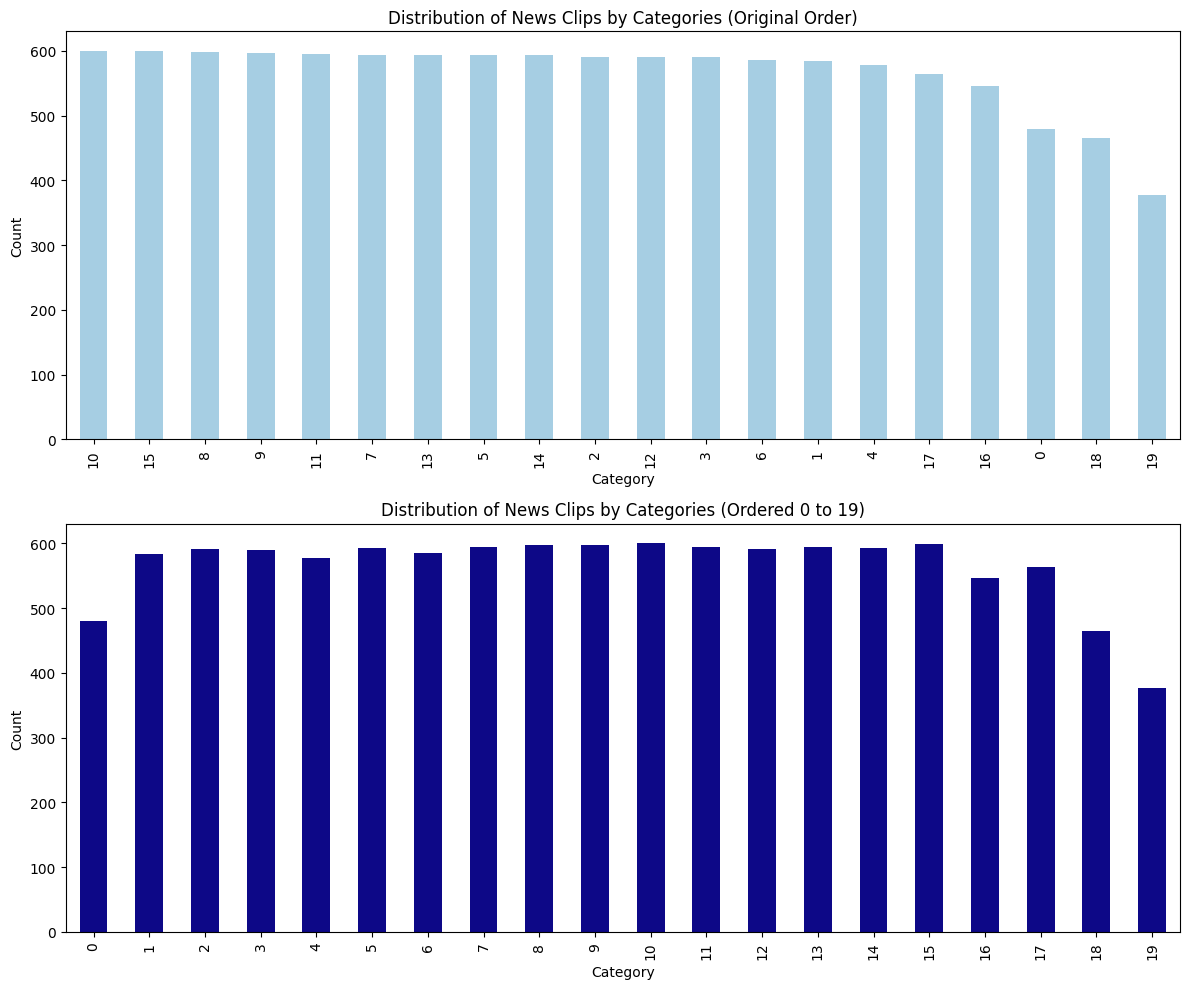

In [61]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig1, ax1 = plt.subplots(2, 1, figsize=(12, 10))

# Plot without reindexing
df['Category'].value_counts().plot(kind='bar', colormap='Paired', ax=ax1[0])
ax1[0].set_title('Distribution of News Clips by Categories (Original Order)')
ax1[0].set_xlabel('Category')
ax1[0].set_ylabel('Count')

# Plot with reindexing
df['Category'].value_counts().reindex(range(20)).plot(kind='bar', colormap='plasma', ax=ax1[1])
ax1[1].set_title('Distribution of News Clips by Categories (Ordered 0 to 19)')
ax1[1].set_xlabel('Category')
ax1[1].set_ylabel('Count')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [37]:
y = df.Category
print(y)
X = df.Text
print(X)

0         7
1         4
2         4
3         1
4        14
         ..
11309    13
11310     4
11311     3
11312     1
11313     8
Name: Category, Length: 11314, dtype: int64
0        From: lerxst@wam.umd.edu (where's my thing)\nS...
1        From: guykuo@carson.u.washington.edu (Guy Kuo)...
2        From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3        From: jgreen@amber (Joe Green)\nSubject: Re: W...
4        From: jcm@head-cfa.harvard.edu (Jonathan McDow...
                               ...                        
11309    From: jim.zisfein@factory.com (Jim Zisfein) \n...
11310    From: ebodin@pearl.tufts.edu\nSubject: Screen ...
11311    From: westes@netcom.com (Will Estes)\nSubject:...
11312    From: steve@hcrlgw (Steven Collins)\nSubject: ...
11313    From: gunning@cco.caltech.edu (Kevin J. Gunnin...
Name: Text, Length: 11314, dtype: object


## Data Cleaning and stopwords

In [59]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def cleanup(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove all characters that are not alphabets
    text = re.sub(r'\s+', ' ', text)  # Remove extra white spaces and tabs
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)  # Remove stopwords
    return text

X = X.apply(cleanup)
print(X)

# Add stopwords removal during preprocessing, which enhances the model's efficiency and performance

0        lerxst wam umd edu thing Subject car Nntp Post...
1        guykuo carson u washington edu Guy Kuo Subject...
2        twillis ec ecn purdue edu Thomas E Willis Subj...
3        jgreen amber Joe Green Subject Weitek P Organi...
4        jcm head cfa harvard edu Jonathan McDowell Sub...
                               ...                        
11309    jim zisfein factory com Jim Zisfein Subject Mi...
11310    ebodin pearl tufts edu Subject Screen Death Ma...
11311    westes netcom com Estes Subject Mounting CPU C...
11312    steve hcrlgw Steven Collins Subject Sphere poi...
11313    gunning cco caltech edu Kevin J Gunning Subjec...
Name: Text, Length: 11314, dtype: object


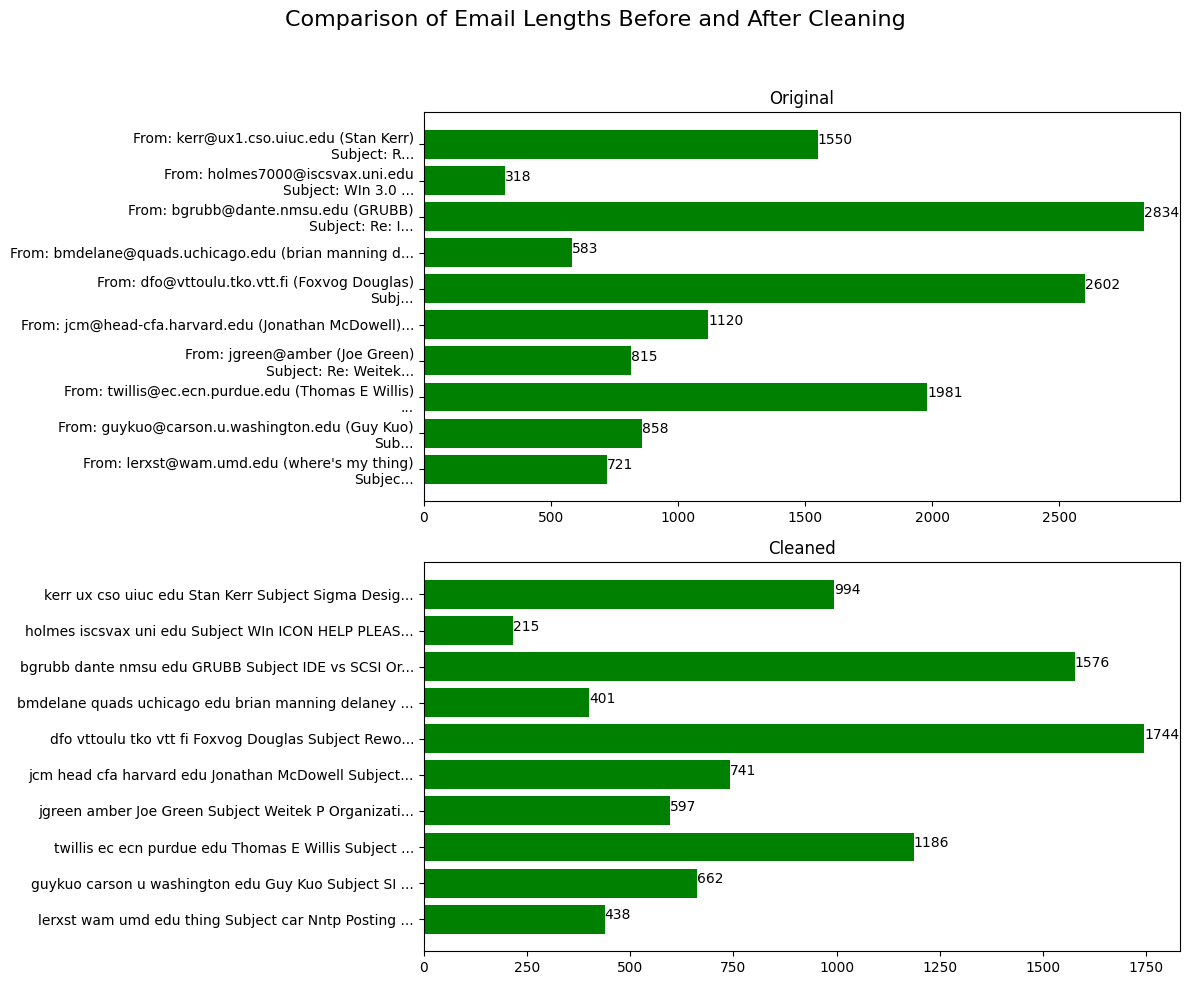

In [67]:
import matplotlib.pyplot as plt

uncleaned_texts = df['Text'][:10]  # Limiting to first 10 samples for better visualization
cleaned_texts = X[:10]

before_and_after_cleanup = {
    'Original': uncleaned_texts,
    'Cleaned': cleaned_texts
    }

fig2, ax2 = plt.subplots(2, 1, figsize=(12, 10))

for i, (title, texts) in enumerate(before_and_after_cleanup.items()):
    ax2[i].barh(range(len(texts)), [len(t) for t in texts], color='green')
    ax2[i].set_yticks(range(len(texts)))
    short_texts = [t[:50] + '...' if len(t) > 50 else t for t in texts] # Shorten the text for better readability on the plot
    ax2[i].set_yticklabels(short_texts)
    ax2[i].set_title(title)
    for index, value in enumerate([len(t) for t in texts]):
        ax2[i].text(value, index, str(value))

plt.suptitle('Comparison of Email Lengths Before and After Cleaning', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Text Vectorization

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=2000, min_df=5,  max_df=0.7)

X_vectorized= tfidf_vect.fit_transform(X).toarray()

print(X_vectorized.shape)
print('\n', X_vectorized)

(11314, 2000)

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
